# Questão de pesquisa 2
"Será que cada tipo de corpo celeste é caracterizado somente por uma única faixa de cor predominante ou uma combinação delas?"

Iremos observar a distribuição das de cada uma das faixas de cor, separado por classe, para observar se existe uma tendência de ausência de cor em alguma classe ou se a tendência é que cada classe possua uma certa quantidade para cadafaixa de cor.

In [9]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from scipy.stats import zscore
from collections import Counter

In [10]:
# leitura dos dados
df = pd.read_csv('../data/star_classification_10.csv', index_col='obj_ID')

# colunas a serem eliminadas
rem_cols = ['run_ID', 'rerun_ID', 'cam_col', 'field_ID', 'spec_obj_ID', 'MJD', 'fiber_ID', 'plate']
df.drop(columns=rem_cols, inplace=True)
df.head()

,alpha,delta,u,g,r,i,z,class,redshift
obj_ID,,,,,,,,,
1.237663e+18,15.342907,0.794882,18.74547,17.49025,16.89122,16.57350,16.29910,GALAXY,0.042002
1.237664e+18,120.365538,55.660432,19.99985,19.68133,19.50156,19.17364,19.16122,QSO,1.633797
1.237655e+18,245.610038,42.974786,23.11792,20.81292,18.88351,18.12335,17.68182,GALAXY,0.454852
1.237660e+18,127.957356,6.647703,21.94454,21.01012,20.93496,20.93184,20.56855,QSO,2.608515
1.237665e+18,159.174526,35.881846,18.89945,17.68422,17.02925,16.60000,16.36798,GALAXY,0.083804


In [12]:
# quantidade de dados na amostra
df.shape

(10000, 9)

### Tipo de corpo celeste e suas cores

Esta seção trata sobre a questão de se cada tipo de corpo celeste é caracterizado somente por uma única faixa de cor predominante ou uma combinação delas. Esse problema vai ser investigado através da análise das distribuições das variáveis que contêm os valores das cores captadas pelos dispositivos.

In [13]:
stars = df[df['class'] == 'STAR']
galaxies = df[df['class'] == 'GALAXY']
quasars = df[df['class'] == 'QSO']

In [14]:
colors = ['u', 'g', 'r', 'i', 'z'] # variáveis que armazenam as cores

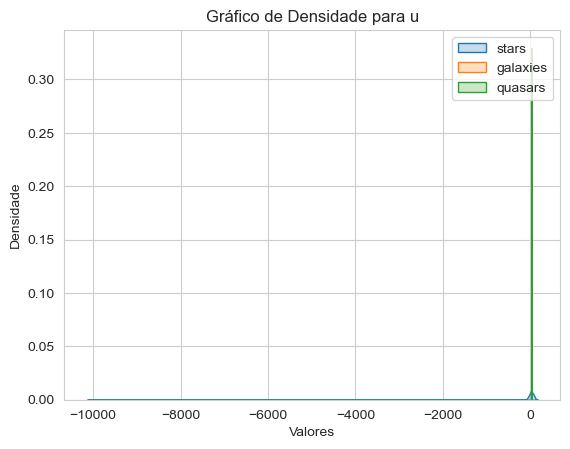

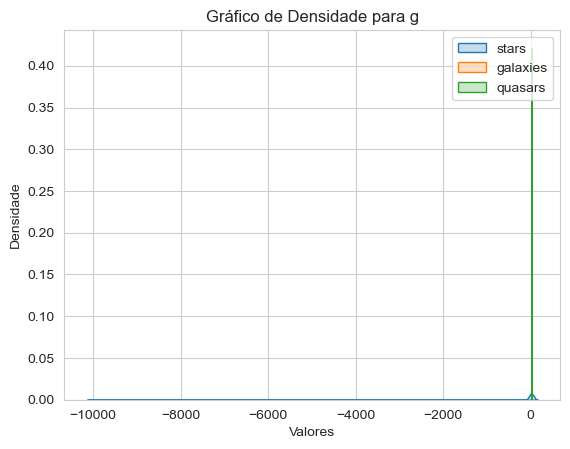

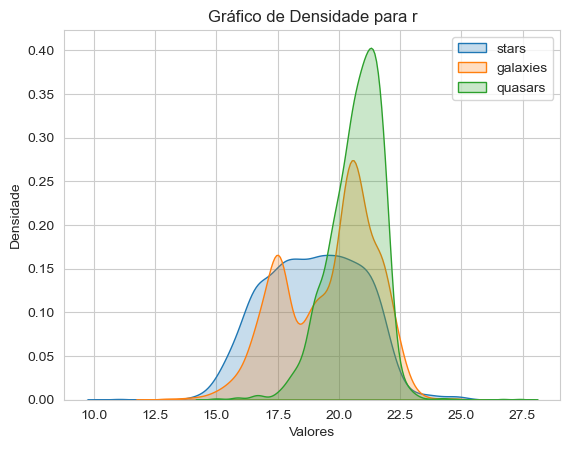

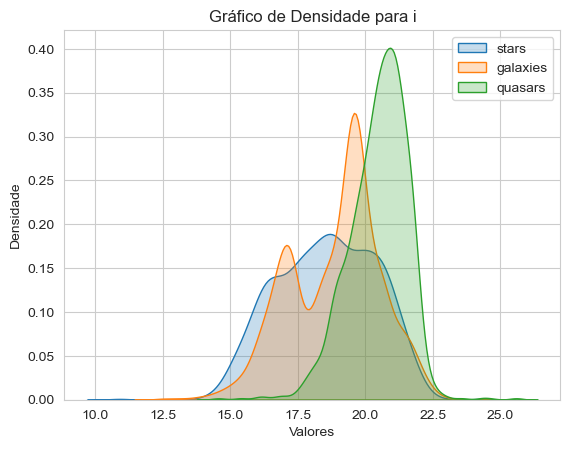

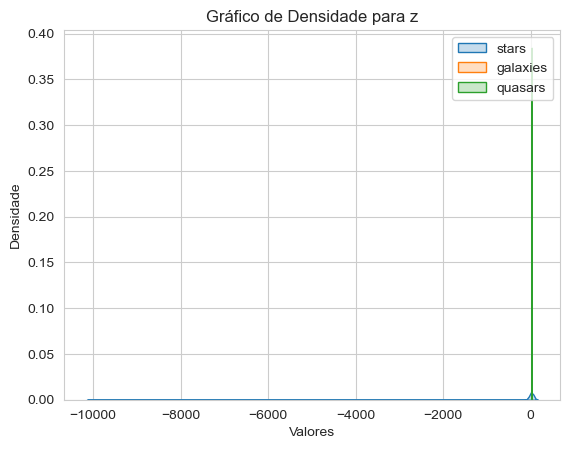

In [15]:
for color in colors:

    # Gerando dados de três distribuições diferentes
    data1 = stars[color]
    data2 = galaxies[color]
    data3 = quasars[color]

    # Configurando o estilo do gráfico
    sns.set_style('whitegrid')

    # Plotando os gráficos de densidade
    sns.kdeplot(data1, fill=True, label='stars')
    sns.kdeplot(data2, fill=True, label='galaxies')
    sns.kdeplot(data3, fill=True, label='quasars')

    # Adicionando legendas e rótulos
    plt.title('Gráfico de Densidade para ' + color)
    plt.xlabel('Valores')
    plt.ylabel('Densidade')
    plt.legend()

    # Exibindo o gráfico
    plt.show()

Algumas das distribuições acima ficaram com suas visualizações distorcidas. Levanta-se a hipótese de que isso se deve à presença de outliers nas variáveis analisadas. Sendo assim, vamos averiguar a existência de outliers através da normalização Z-score, caracterizada por medir quantos desvios padrão um ponto de dados está longe da média. Valores com Z-score acima do valor 3, um valor arbitrário escolhido, isto é, que se afastam a uma distância maior do que 3 desvios padrão da média, serão considerados outliers.

Iremos analisar também quantos dados serão considerados outliers, e à qual classe eles pertencem, uma vez que removê-los cegamente pode levar a um viés no conjunto de dados.

In [16]:
removed_classes = []

for color in colors:

    outliers = None

    # Calculando o Z-score
    z_scores = zscore(df[color])

    # Definindo um limite para considerar outliers (por exemplo, Z-score maior que 3)
    outliers = df[(z_scores > 3) | (z_scores < -3)]

    for index, row in outliers.iterrows():
        removed_classes.append(row['class'])

In [17]:
# contagem de quantos outliers existe para cada dado
contagem = Counter(removed_classes)

print(contagem)

Counter({'GALAXY': 32, 'STAR': 9, 'QSO': 5})


In [50]:
perc_galaxies_rem = round(contagem['GALAXY'] / galaxies.shape[0] * 100, 2)
perc_stars_rem = round(contagem['STAR'] / stars.shape[0] * 100, 2)
perc_quasars_rem = round(contagem['QSO'] / quasars.shape[0] * 100, 2)

print(f'Proporção de outliers de galáxias que seriam removidos: {perc_galaxies_rem}%')
print(f'Proporção de outliers de estrelas que seriam removidos: {perc_stars_rem}%')
print(f'Proporção de outliers de quasares que seriam removidos: {perc_quasars_rem}%')

Proporção de outliers de galáxias que seriam removidos: 0.54%
Proporção de outliers de estrelas que seriam removidos: 0.42%
Proporção de outliers de quasares que seriam removidos: 0.27%


Como a proporção de outliers para todas as classes é no máximo 0.54% e a amostra é numerosa ao possuir 10.000 dados, portanto optaremos por removê-los a fim de melhorar a visualização das distribuições.

In [21]:
for color in colors:

    outliers = None

    # Calculando o Z-score
    z_scores = zscore(df[color])

    # Definindo um limite para considerar outliers (por exemplo, Z-score maior que 3)
    outliers = df[(z_scores > 3) | (z_scores < -3)]

    rem_index = outliers.index

    # eliminação dos outliers
    df.drop(rem_index, axis=0, inplace=True)

In [22]:
# Atualização dos subconjuntos
stars = df[df['class'] == 'STAR']
galaxies = df[df['class'] == 'GALAXY']
quasars = df[df['class'] == 'QSO']

Agora iremos averiguar se a visualização das distribuições ficou melhor.

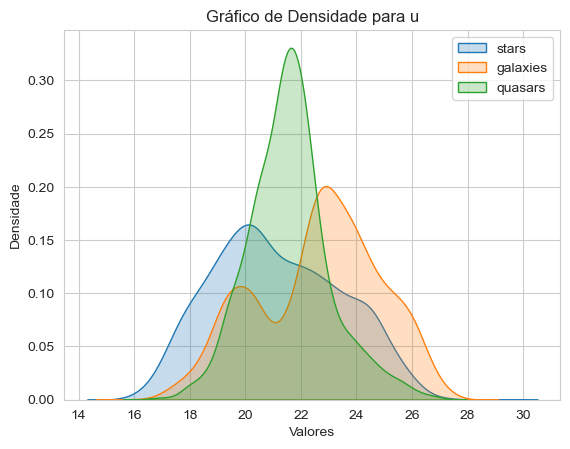

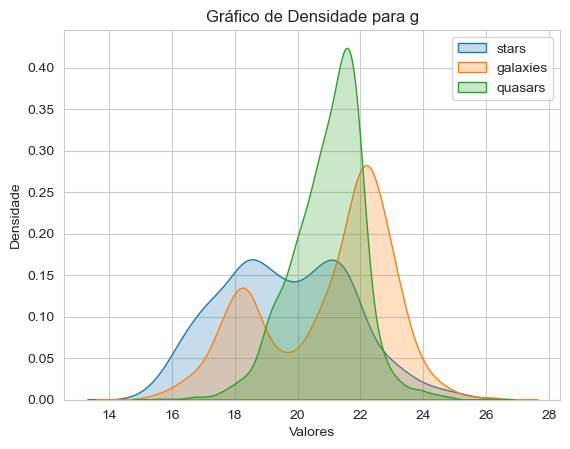

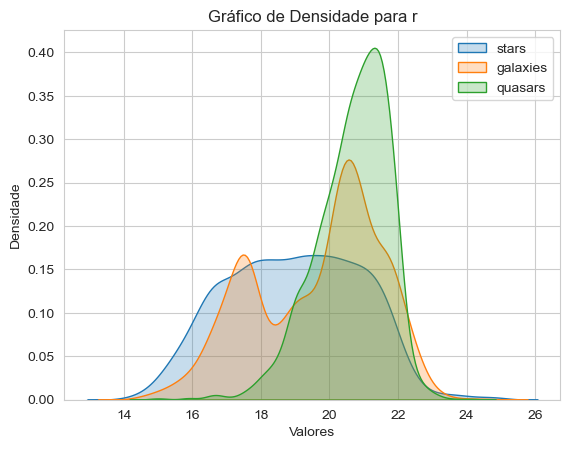

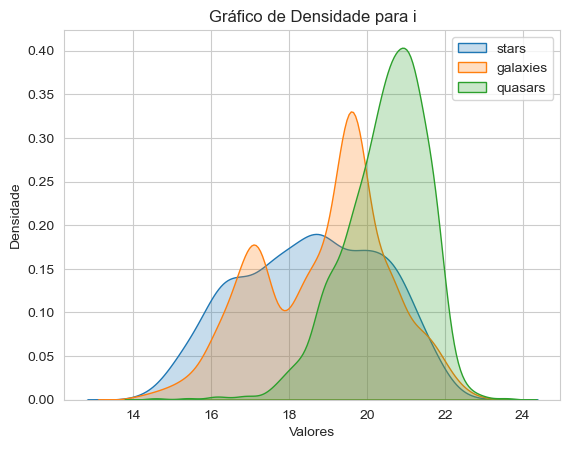

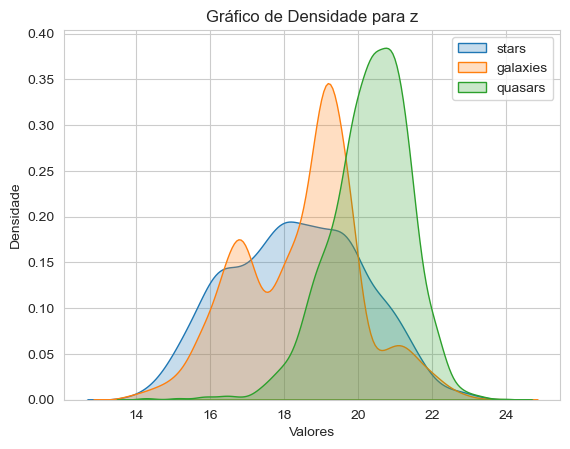

In [23]:
for color in colors:

    # Gerando dados de três distribuições diferentes
    data1 = stars[color]
    data2 = galaxies[color]
    data3 = quasars[color]

    # Configurando o estilo do gráfico
    sns.set_style('whitegrid')

    # Plotando os gráficos de densidade
    sns.kdeplot(data1, fill=True, label='stars')
    sns.kdeplot(data2, fill=True, label='galaxies')
    sns.kdeplot(data3, fill=True, label='quasars')

    # Adicionando legendas e rótulos
    plt.title('Gráfico de Densidade para ' + color)
    plt.xlabel('Valores')
    plt.ylabel('Densidade')
    plt.legend()

    # Exibindo o gráfico
    plt.show()

Nossa hipótese estava correta, pois ao retirarmos os outliers, as distribuições agora podem ser facilmente analisadas.

Podemos observar que nenhum tipo de corpo celeste tende a possuir ausência de alguma cor, indicando que nenhuma classe é exclusivamente associada a uma única cor. Em vez disso, a tendência é de que cada tipo de corpo celeste é identificado por uma combinação de cores. 

Além disso, ao examinar as distribuições de valores das cores, percebemos visualmente que, para qualquer cor específica, a distribuição difere  entre as diferentes classes estelares. Embora possa haver sobreposições consideráveis em algumas cores, uma análise conjunta de todas as cores facilita a distinção entre as classes. Essa clara diferenciação pode oferecer uma vantagem importante para o modelo de aprendizado de máquina na identificação de padrões e, consequentemente, na realização de predições com maior precisão.

# Questão de pesquisa 1
"Existem determinadas regiões definidas pelos ângulos alpha e delta que possuem agrupamentos de uma classe específica?"

Iremos observar a distribuição espacial de cada uma das classes para verificar se existe alguma tendência de agrupamento por classe em região do espaço.

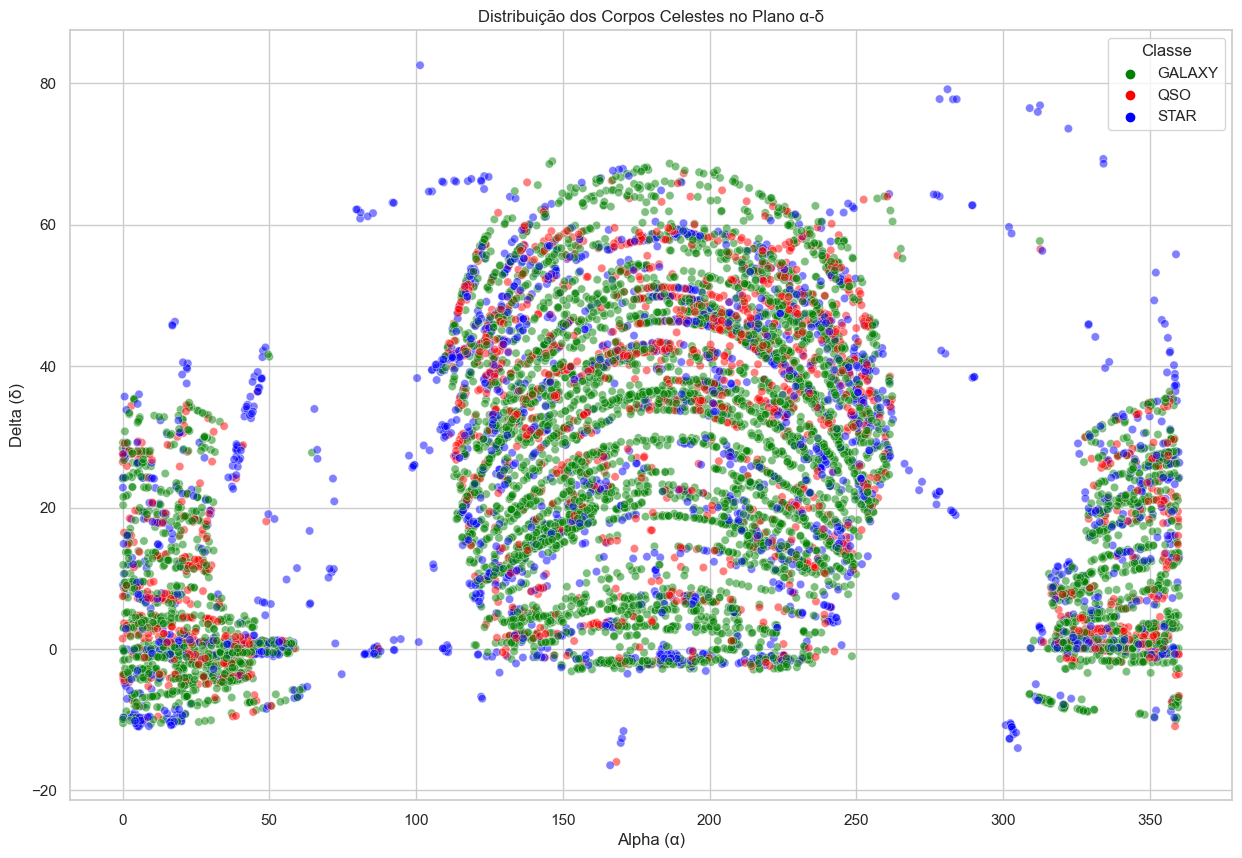

In [55]:
palette = {'STAR': 'blue', 'GALAXY': 'green', 'QSO': 'red'}

# Plotar os corpos celestes no plano α-δ, colorindo por classe
plt.figure(figsize=(15, 10))
sns.scatterplot(x='alpha', y='delta', hue='class', data=df, palette=palette, alpha=0.5)
plt.title('Distribuição dos Corpos Celestes no Plano α-δ')
plt.xlabel('Alpha (α)')
plt.ylabel('Delta (δ)')
plt.legend(title='Classe')
plt.show()

Através da visualização acima, é possível verificar que não existe um agrupamento claro de classe em determinada região do espaço.

## Visualização 3D

A seguir será feita uma visualização em um espaço tridimensional para averiguar a distribuição das classes. Essa visualização será feita em uma representação visual da esfera celeste em que cada ponto estaria localizado.

In [56]:
# Função para converter coordenadas esféricas para cartesiana
def spherical_to_cartesian(alpha, delta):
    alpha_rad = np.radians(alpha)
    delta_rad = np.radians(delta)
    
    x = np.cos(delta_rad) * np.cos(alpha_rad)
    y = np.cos(delta_rad) * np.sin(alpha_rad)
    z = np.sin(delta_rad)
    
    return x, y, z

# Aplicar a conversão no dataset
df['x'], df['y'], df['z'] = spherical_to_cartesian(df['alpha'], df['delta'])

In [ ]:
# Função para converter coordenadas esféricas para cartesiana
def spherical_to_cartesian(alpha, delta):
    alpha_rad = np.radians(alpha)
    delta_rad = np.radians(delta)
    
    x = np.cos(delta_rad) * np.cos(alpha_rad)
    y = np.cos(delta_rad) * np.sin(alpha_rad)
    z = np.sin(delta_rad)
    
    return x, y, z

# Aplicar a conversão no dataset
df['x'], df['y'], df['z'] = spherical_to_cartesian(df['alpha'], df['delta'])

Primeiramente, vamos analisar cada classe isoladamente:

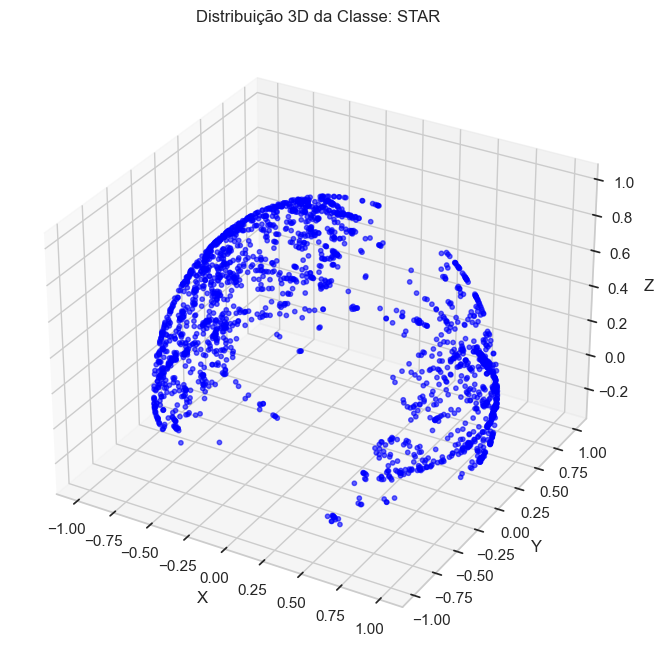

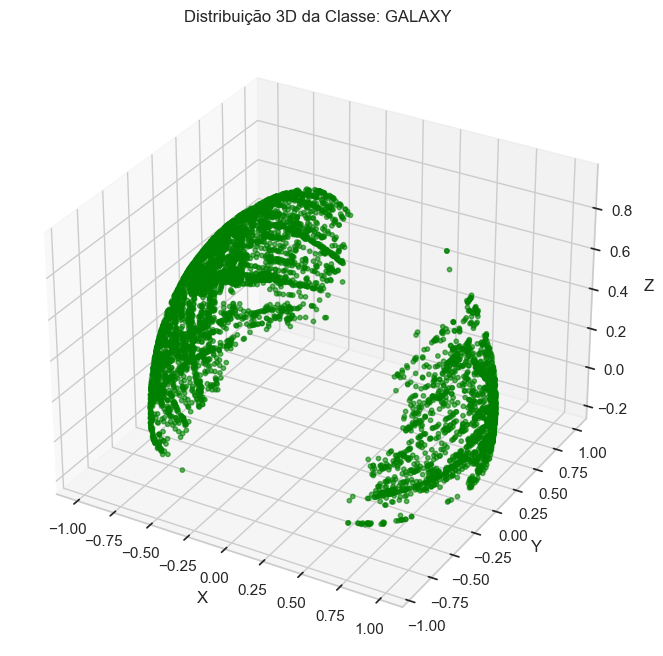

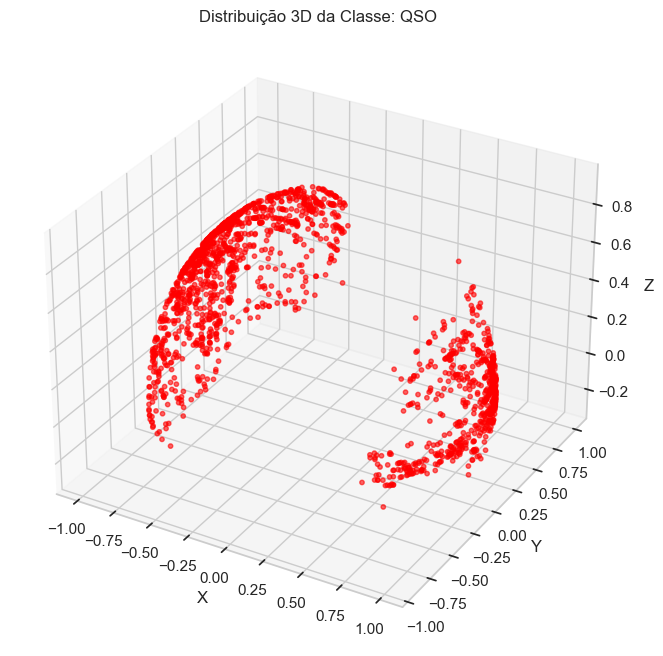

In [74]:
# Mapear classes para cores
colors = {'STAR': 'blue', 'GALAXY': 'green', 'QSO': 'red'}

# Função para plotar uma classe específica
def plot_class(df, class_name, color):
    fig = plt.figure(figsize=(12, 8))
    ax = fig.add_subplot(111, projection='3d')
    class_data = df[df['class'] == class_name]
    ax.scatter(class_data['x'], class_data['y'], class_data['z'], c=color, s=10, alpha=0.6)
    ax.set_title(f'Distribuição 3D da Classe: {class_name}')
    ax.set_xlabel('X')
    ax.set_ylabel('Y')
    ax.set_zlabel('Z')
    plt.show()

# Plotar cada classe separadamente
plot_class(df, 'STAR', colors['STAR'])
plot_class(df, 'GALAXY', colors['GALAXY'])
plot_class(df, 'QSO', colors['QSO'])

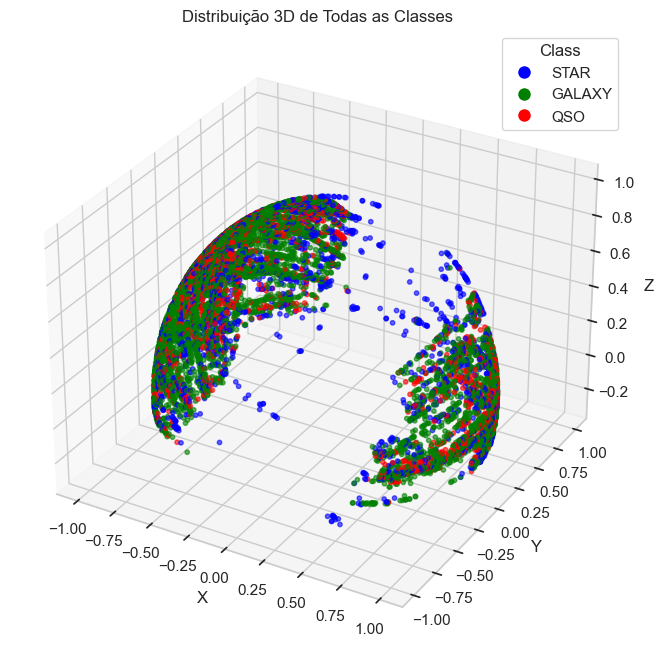

In [79]:
# Configurar o plot 3D
fig = plt.figure(figsize=(12, 8))
ax = fig.add_subplot(111, projection='3d')

# Mapear classes para cores
colors = {'STAR': 'blue', 'GALAXY': 'green', 'QSO': 'red'}
df['color'] = df['class'].map(colors)

# Plotar os dados
scatter = ax.scatter(df['x'], df['y'], df['z'], c=df['color'], s=10, alpha=0.6)

# Configurações do gráfico
ax.set_title('Distribuição 3D de Todas as Classes')
ax.set_xlabel('X')
ax.set_ylabel('Y')
ax.set_zlabel('Z')

# Adicionar legenda
class_labels = [plt.Line2D([0], [0], marker='o', color='w', markerfacecolor=color, markersize=10) for color in colors.values()]
ax.legend(class_labels, colors.keys(), title="Class")

plt.show()

A partir dos gráficos acima, verificamos visualmente que não existe uma região específica do espaço em que haja um agrupamento de um tipo de corpo celeste. Pelo contrário, aparentemente os corpos se localizam em regiões similares no espaço.

Portanto, baseando-se nas visualizações 2D e 3D, podemos concluir que não existem agrupamentos no espaço por classe.